In [1]:
import pandas as pd
import numpy as num

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('emails.csv')

In [5]:
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [13]:
ham=df[df['spam']==0]

In [14]:
ham

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [10]:
spam=df[df['spam']==1]

In [15]:
spam

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1
1364,Subject: would you like a $ 250 gas card ? do...,1
1365,"Subject: immediate reply needed dear sir , i...",1
1366,Subject: wanna see me get fisted ? fist bang...,1


In [17]:
print('Spam percentage=',len(spam)/len(df)*100)

Spam percentage= 23.88268156424581


In [18]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
spamham_vectorizer=vectorizer.fit_transform(df['text'])

In [30]:
print(vectorizer.get_feature_names_out())

['00' '000' '0000' ... 'zzn' 'zzncacst' 'zzzz']


In [31]:
print(spamham_vectorizer.toarray()

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [33]:
spamham_vectorizer.shape

(5728, 37303)

In [35]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier=MultinomialNB()
NB_classifier.fit(spamham_vectorizer,label)

MultinomialNB()

In [36]:
label=df['spam'].values
label

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [40]:
test_sample=['Free money!!','Respected sir I am writing ','no money! play on xbet']
test_sample_countvectorizer=vectorizer.transform(test_sample)

In [41]:
test_predict=NB_classifier.predict(test_sample_countvectorizer)
test_predict

array([1, 0, 1], dtype=int64)

In [47]:
x=spamham_vectorizer
y=label

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [49]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier=MultinomialNB()
NB_classifier.fit(X_train,y_train)

MultinomialNB()

In [50]:
from sklearn.metrics import confusion_matrix,classification_report
y_train_predict=NB_classifier.predict(X_train)
y_train_predict

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

<Axes: >

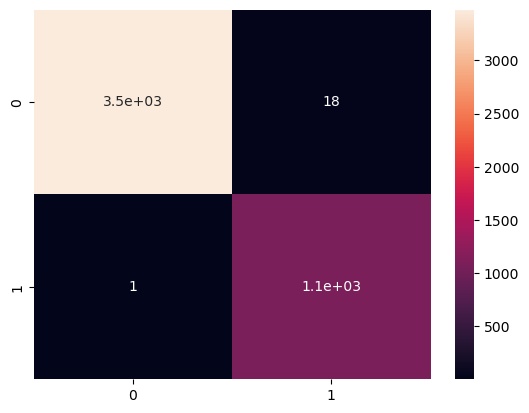

In [51]:
cm=confusion_matrix(y_train,y_train_predict)
sns.heatmap(cm,annot=True)

In [52]:
y_test_predict=NB_classifier.predict(X_test)
y_test_predict

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

<Axes: >

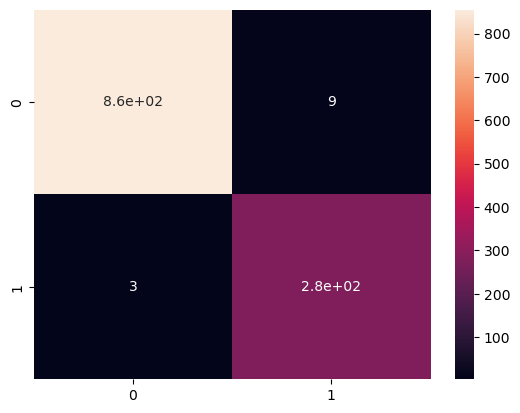

In [53]:
cm=confusion_matrix(y_test,y_test_predict)
sns.heatmap(cm,annot=True)

In [54]:
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       864
           1       0.97      0.99      0.98       282

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146

